# Final Project - Does salary impact employee attrition?

Zachary Campbell Week 12 Final Project

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Downloaded thinkstats2.py
Downloaded thinkplot.py


In [24]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import thinkstats2
import thinkplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


The below imports the dataset and puts the 5 varables being tested into 5 different arrays and graphs each of these variables in the form of a histogram

In [7]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

monthly_income = df['MonthlyIncome']
job_level = df['JobLevel']
performance_rating = df['PerformanceRating']
years_at_company = df['YearsAtCompany']
age = df['Age']

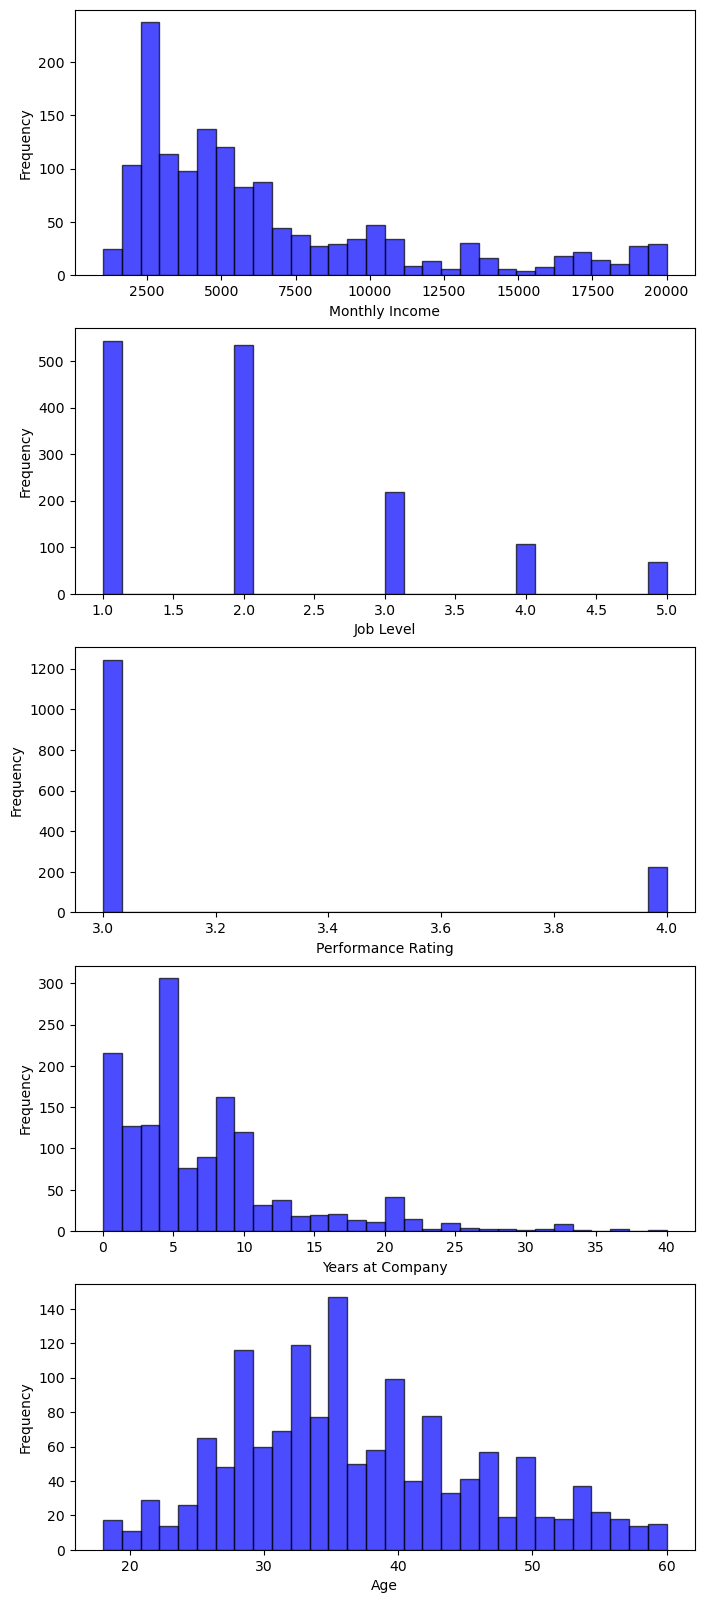

In [18]:
# Set histogram parameters
hist_params = dict(alpha=0.7, color='blue', bins=30, edgecolor='black')

# Generate and plot histograms for each variable
fig, axs = plt.subplots(5, 1, figsize=(8, 20))

axs[0].hist(monthly_income, **hist_params)
axs[0].set(xlabel='Monthly Income', ylabel='Frequency')

axs[1].hist(job_level, **hist_params)
axs[1].set(xlabel='Job Level', ylabel='Frequency')

axs[2].hist(performance_rating, **hist_params)
axs[2].set(xlabel='Performance Rating', ylabel='Frequency')

axs[3].hist(years_at_company, **hist_params)
axs[3].set(xlabel='Years at Company', ylabel='Frequency')

axs[4].hist(age, **hist_params)
axs[4].set(xlabel='Age', ylabel='Frequency')

plt.show()

The below calculates the mean, mode, variance, standard deviation and skewness of the different variables and outputs them in a readable format

In [25]:
# Calculate mean
mean_monthly_income = monthly_income.mean()
mean_job_level = job_level.mean()
mean_performance_rating = performance_rating.mean()
mean_years_at_company = years_at_company.mean()
mean_age = age.mean()

# Calculate mode
mode_monthly_income = stats.mode(monthly_income)[0][0]
mode_job_level = stats.mode(job_level)[0][0]
mode_performance_rating = stats.mode(performance_rating)[0][0]
mode_years_at_company = stats.mode(years_at_company)[0][0]
mode_age = stats.mode(age)[0][0]

# Calculate variance
var_monthly_income = monthly_income.var()
var_job_level = job_level.var()
var_performance_rating = performance_rating.var()
var_years_at_company = years_at_company.var()
var_age = age.var()

# Calculate standard deviation
std_monthly_income = monthly_income.std()
std_job_level = job_level.std()
std_performance_rating = performance_rating.std()
std_years_at_company = years_at_company.std()
std_age = age.std()

# Calculate skewness
skew_monthly_income = monthly_income.skew()
skew_job_level = job_level.skew()
skew_performance_rating = performance_rating.skew()
skew_years_at_company = years_at_company.skew()
skew_age = age.skew()

# Print results
print('Monthly Income:')
print('Mean:', mean_monthly_income)
print('Mode:', mode_monthly_income)
print('Variance:', var_monthly_income)
print('Standard Deviation:', std_monthly_income)
print('Skewness:', skew_monthly_income)
print('\n')
print('Job Level:')
print('Mean:', mean_job_level)
print('Mode:', mode_job_level)
print('Variance:', var_job_level)
print('Standard Deviation:', std_job_level)
print('Skewness:', skew_job_level)
print('\n')
print('Performance Rating:')
print('Mean:', mean_performance_rating)
print('Mode:', mode_performance_rating)
print('Variance:', var_performance_rating)
print('Standard Deviation:', std_performance_rating)
print('Skewness:', skew_performance_rating)
print('\n')
print('Years at Company:')
print('Mean:', mean_years_at_company)
print('Mode:', mode_years_at_company)
print('Variance:', var_years_at_company)
print('Standard Deviation:', std_years_at_company)
print('Skewness:', skew_years_at_company)
print('\n')
print('Age:')
print('Mean:', mean_age)
print('Mode:', mode_age)
print('Variance:', var_age)
print('Standard Deviation:', std_age)
print('Skewness:', skew_age)


Monthly Income:
Mean: 6502.931292517007
Mode: 2342
Variance: 22164857.07151842
Standard Deviation: 4707.956783097995
Skewness: 1.3698166808390662


Job Level:
Mean: 2.0639455782312925
Mode: 1
Variance: 1.2253159398544744
Standard Deviation: 1.1069398989351114
Skewness: 1.0254012829518246


Performance Rating:
Mean: 3.1537414965986397
Mode: 3
Variance: 0.13019361590790227
Standard Deviation: 0.36082352460434486
Skewness: 1.921882702142603


Years at Company:
Mean: 7.0081632653061225
Mode: 5
Variance: 37.53431044303354
Standard Deviation: 6.126525152403566
Skewness: 1.7645294543422085


Age:
Mean: 36.923809523809524
Mode: 35
Variance: 83.45504878602227
Standard Deviation: 9.135373489136734
Skewness: 0.4132863018563338


The below graph is a comparison of the income and its impact on attrition using two density plots.

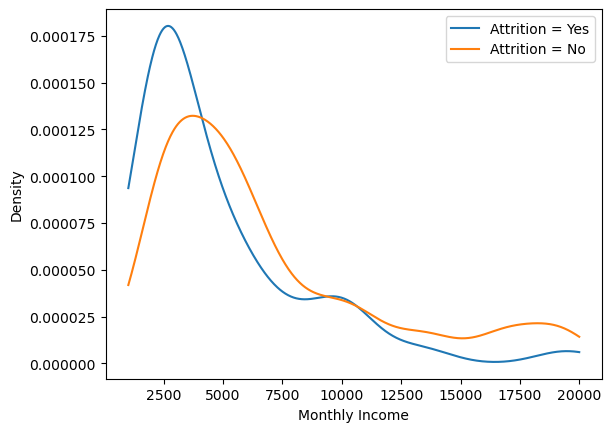

In [30]:
from scipy.stats import gaussian_kde

# create subsets of data
attrition_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
attrition_no = df[df['Attrition'] == 'No']['MonthlyIncome']

# create kernel density estimates
kde_yes = gaussian_kde(attrition_yes)
kde_no = gaussian_kde(attrition_no)

# set x range for plot
x = np.linspace(df['MonthlyIncome'].min(), df['MonthlyIncome'].max(), 1000)

# plot density curves
plt.plot(x, kde_yes(x), label='Attrition = Yes')
plt.plot(x, kde_no(x), label='Attrition = No')

# add legend
plt.legend()

# add labels
plt.xlabel('Monthly Income')
plt.ylabel('Density')

# show plot
plt.show()


This calculates the CDF of the data "Monthly Income"

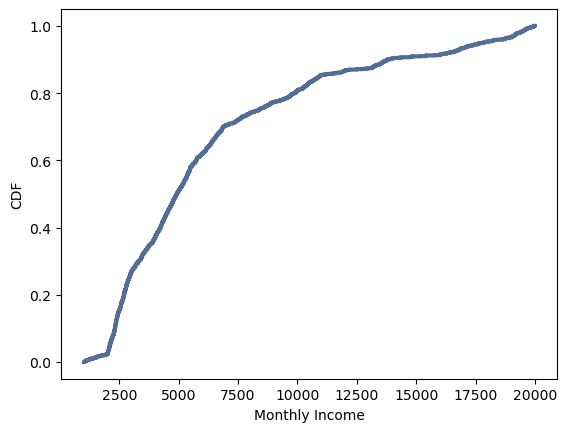

<Figure size 800x600 with 0 Axes>

In [31]:
cdf = thinkstats2.Cdf(monthly_income)

thinkplot.Cdf(cdf)
thinkplot.show(xlabel='Monthly Income', ylabel='CDF')

This is used to determine if the monthly income data follows a normal distribution and visualizes it

In [36]:
from scipy.stats import norm

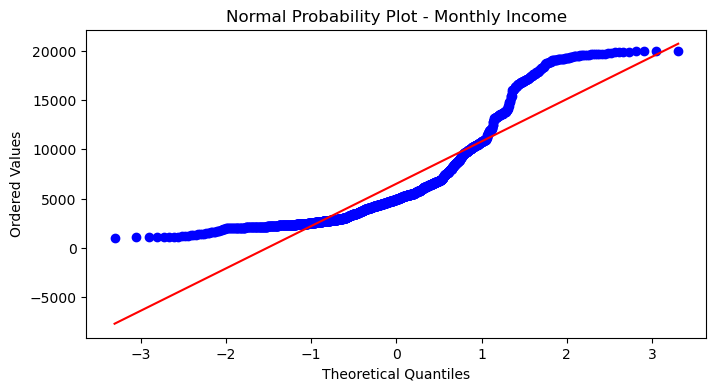

In [38]:
# Create the normal probability plot
fig, ax = plt.subplots(figsize=(8, 4))
res = stats.probplot(monthly_income, plot=ax)

# Add labels and title
ax.set_title("Normal Probability Plot - Monthly Income")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Ordered Values")
plt.show()


The below calculates the correlation between Monthly Income and Job Level and Monthly income and Age.

Covariance between Monthly Income and Job Level: 4952.416922058136
Pearson's correlation between Monthly Income and Job Level: 0.9502999134798462


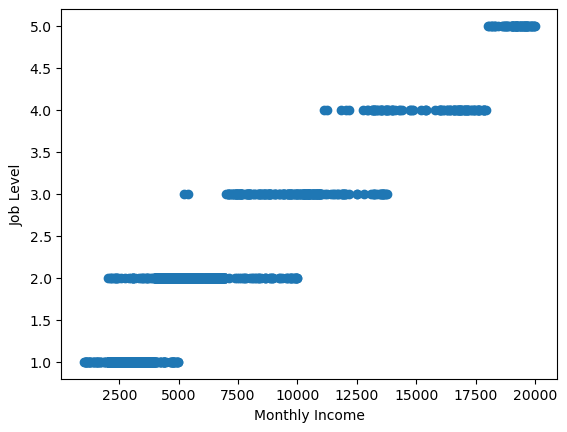

In [40]:
# Calculate covariance
covariance = np.cov(df['MonthlyIncome'], df['JobLevel'])[0][1]
print("Covariance between Monthly Income and Job Level:", covariance)

# Calculate Pearson's correlation
correlation = np.corrcoef(df['MonthlyIncome'], df['JobLevel'])[0][1]
print("Pearson's correlation between Monthly Income and Job Level:", correlation)

# Create scatter plot
import matplotlib.pyplot as plt
plt.scatter(df['MonthlyIncome'], df['JobLevel'])
plt.xlabel('Monthly Income')
plt.ylabel('Job Level')
plt.show()

Covariance between Monthly Income and Age: 21412.19898213881
Pearson's correlation between Monthly Income and Age: 0.4978545669265805


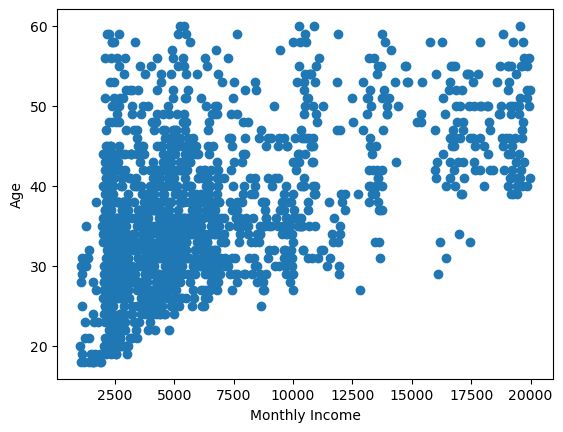

In [41]:
# Calculate covariance
covariance = np.cov(df['MonthlyIncome'], df['Age'])[0][1]
print("Covariance between Monthly Income and Age:", covariance)

# Calculate Pearson's correlation
correlation = np.corrcoef(df['MonthlyIncome'], df['Age'])[0][1]
print("Pearson's correlation between Monthly Income and Age:", correlation)

# Create scatter plot
import matplotlib.pyplot as plt
plt.scatter(df['MonthlyIncome'], df['Age'])
plt.xlabel('Monthly Income')
plt.ylabel('Age')
plt.show()


The below is used to perform hypothesis testing.

In [42]:
# create contingency table
cont_table = pd.crosstab(df.Attrition, df.JobLevel)
print(cont_table)

JobLevel     1    2    3    4   5
Attrition                        
No         400  482  186  101  64
Yes        143   52   32    5   5


In [43]:
# perform chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(cont_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")


Chi-Squared Statistic: 72.52901310667391
P-value: 6.634684715458909e-15


The below is a regression analysis between years at the company and monthly income

In [44]:
import statsmodels.api as sm
# select the variables of interest
X = df['YearsAtCompany'] # explanatory variable
y = df['MonthlyIncome'] # dependent variable

# add a constant to the explanatory variable
X = sm.add_constant(X)

# fit the linear regression model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     527.9
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          4.82e-100
Time:                        12:08:41   Log-Likelihood:                -14291.
No. Observations:                1470   AIC:                         2.859e+04
Df Residuals:                    1468   BIC:                         2.860e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3733.2731    160.091     23.

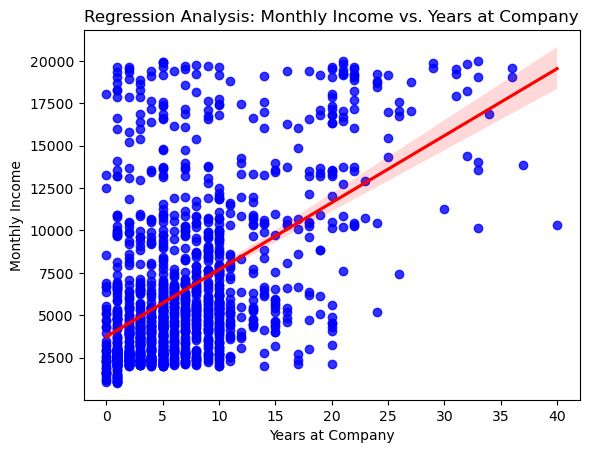

In [46]:
sns.regplot(x="YearsAtCompany", y="MonthlyIncome", data=df, color="blue", line_kws={"color":"red"})
plt.title("Regression Analysis: Monthly Income vs. Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Monthly Income")
plt.show()
